# Logistic Regression
- Binary classification (0 or 1)
- uses sigmoid function to convert input into probability
- y_hat = sigmoid(wx+b)
- sigmoid function is activation function
- sigmoid(z)=1/(1+e^(-z))
- The output of sigmoid function is in range of [0, 1]

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("./data/data//diabetes (1).csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72.0,35,0,33.6,0.627,50,1
1,1,85,66.0,29,0,26.6,0.351,31,0
2,8,183,64.0,0,0,23.3,0.672,32,1
3,1,89,66.0,23,94,28.1,0.167,21,0
4,0,137,40.0,35,168,43.1,2.288,33,1


In [3]:
df.duplicated().sum()

np.int64(0)

### No duplicate values

In [4]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               1
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

BloodPressure feature has one missing values

In [5]:
bp_median=df["BloodPressure"].median()
bp_median

np.float64(72.0)

In [6]:
df[df["BloodPressure"].isna()]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
12,10,139,NaN,0,0,27.1,1.441,57,0


In [7]:
df["BloodPressure"]=np.where(df["BloodPressure"].isna(), bp_median, df["BloodPressure"])

In [8]:
df.head(15)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72.0,35,0,33.6,0.627,50,1
1,1,85,66.0,29,0,26.6,0.351,31,0
2,8,183,64.0,0,0,23.3,0.672,32,1
3,1,89,66.0,23,94,28.1,0.167,21,0
4,0,137,40.0,35,168,43.1,2.288,33,1
5,5,116,74.0,0,0,25.6,0.201,30,0
6,3,78,50.0,32,88,31.0,0.248,26,1
7,10,115,0.0,0,0,35.3,0.134,29,0
8,2,197,70.0,45,543,30.5,0.158,53,1
9,8,125,96.0,0,0,0.0,0.232,54,1


In [9]:
df[df["BloodPressure"].isna()]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


## TODO: Outlier detectiona and identification

### Dependent and independent features

In [10]:
X=df.drop("Outcome", axis=1)
y=df["Outcome"]

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test=train_test_split(X, y, train_size=0.8, random_state=42)

In [12]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((614, 8), (154, 8), (614,), (154,))

In [13]:
from sklearn.linear_model import LogisticRegression
lr_clf=LogisticRegression(max_iter=140)
lr_clf.fit(X_train, y_train)

LogisticRegression(max_iter=140)

In [14]:
y_pred_sk=lr_clf.predict(X_test)
y_pred_sk

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

In [15]:
pd.DataFrame({
    "y_test": y_test,
    "y_pred": y_pred_sk
}).head(10)

,y_test,y_pred
668,0,0
324,0,0
624,0,0
690,0,0
473,0,0
204,0,0
97,0,0
336,0,1
568,0,1
148,0,1


In [16]:
from sklearn.metrics import f1_score, accuracy_score
# accuracy = total_number of correct prediction / total number of prediction
accuracy_score(y_test, y_pred_sk) * 100

74.67532467532467

### Confusion metrics

In [17]:
from sklearn.metrics import confusion_matrix

mat=confusion_matrix(y_test, y_pred_sk)
mat

array([[78, 21],
       [18, 37]])

<class 'function'>


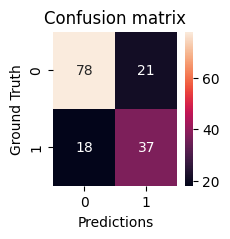

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(2, 2))
print(type(plt.figure))

sns.heatmap(mat, annot=True)
plt.ylabel('Ground Truth')
plt.xlabel('Predictions')
plt.title('Confusion matrix')
plt.show()